**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/content/traffic dataset (1).csv')
df.head(10)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
5,2015-11-01 05:00:00,1,6,20151101051
6,2015-11-01 06:00:00,1,9,20151101061
7,2015-11-01 07:00:00,1,8,20151101071
8,2015-11-01 08:00:00,1,11,20151101081
9,2015-11-01 09:00:00,1,12,20151101091


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


**Check for Missing Values**

In [4]:
# Summary of missing values
missing_report = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

# Display report
missing_report = pd.DataFrame({
    'Missing Values': missing_report,
    'Percentage': missing_percent
})
print(missing_report)


          Missing Values  Percentage
DateTime               0         0.0
Junction               0         0.0
Vehicles               0         0.0
ID                     0         0.0


**Checking If Outliers Exist?**

In [6]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


**Convert DateTime to Standard Format**

In [9]:
# Convert to datetime
df['DateTime'] = pd.to_datetime(df['DateTime'],format='%Y-%m-%d %H:%M:%S')

# Extract useful components
df['Date'] = df['DateTime'].dt.date
df['Hour'] = df['DateTime'].dt.hour
df['Weekday'] = df['DateTime'].dt.day_name()
df['Month'] =df ['DateTime'].dt.to_period('M')
print(df[['DateTime','Date','Hour','Weekday','Month']])

                 DateTime        Date  Hour Weekday    Month
0     2015-11-01 00:00:00  2015-11-01     0  Sunday  2015-11
1     2015-11-01 01:00:00  2015-11-01     1  Sunday  2015-11
2     2015-11-01 02:00:00  2015-11-01     2  Sunday  2015-11
3     2015-11-01 03:00:00  2015-11-01     3  Sunday  2015-11
4     2015-11-01 04:00:00  2015-11-01     4  Sunday  2015-11
...                   ...         ...   ...     ...      ...
48115 2017-06-30 19:00:00  2017-06-30    19  Friday  2017-06
48116 2017-06-30 20:00:00  2017-06-30    20  Friday  2017-06
48117 2017-06-30 21:00:00  2017-06-30    21  Friday  2017-06
48118 2017-06-30 22:00:00  2017-06-30    22  Friday  2017-06
48119 2017-06-30 23:00:00  2017-06-30    23  Friday  2017-06

[48120 rows x 5 columns]


**Before Outlier Removal**

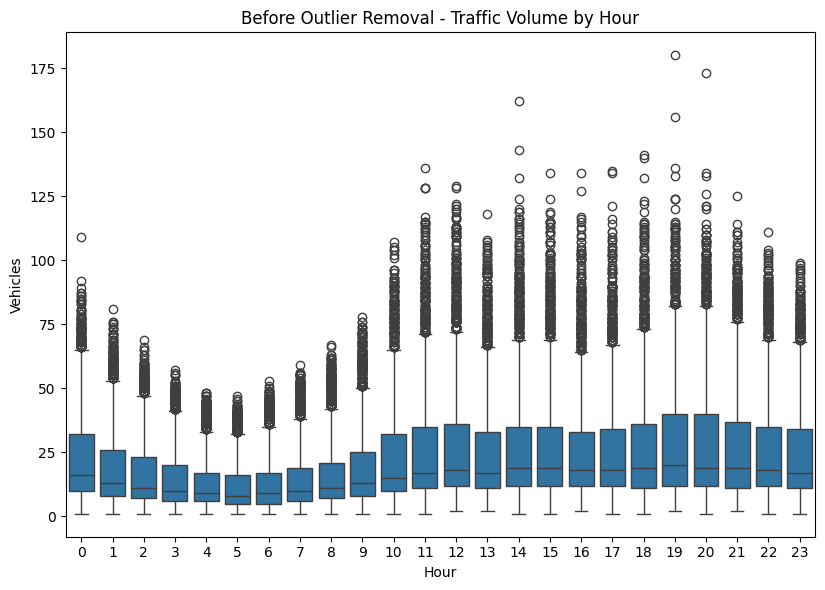

In [10]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 cols, subplot 1
sns.boxplot(x='Hour', y='Vehicles', data=df)
plt.title('Before Outlier Removal - Traffic Volume by Hour')
plt.xlabel('Hour')
plt.ylabel('Vehicles')
plt.tight_layout()
plt.show()

** Detect and Remove Outliers in Vehicles Column (Using IQR)**

In [11]:
# Compute IQR
Q1 = df['Vehicles'].quantile(0.25)
Q3 = df['Vehicles'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_cleaned = df[(df['Vehicles'] >= lower_bound) & (df['Vehicles'] <= upper_bound)]

# Check how many were removed
print("Original rows:", len(df))
print("Cleaned rows:", len(df_cleaned))
print("Outliers removed:", len(df) - len(df_cleaned))


Original rows: 48120
Cleaned rows: 44503
Outliers removed: 3617


**After Outlier Removal**

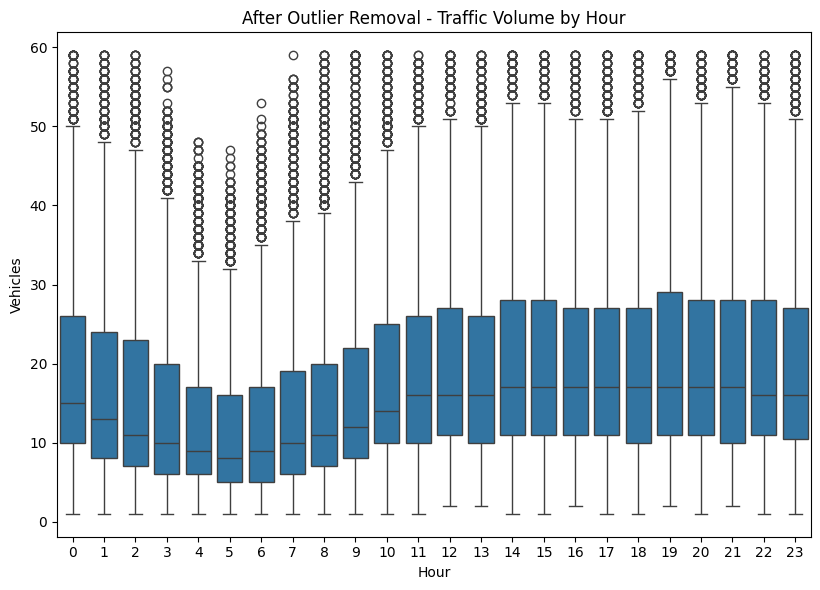

In [12]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 2)  # 1 row, 2 cols, subplot 2
sns.boxplot(x='Hour', y='Vehicles', data=df_cleaned)
plt.title('After Outlier Removal - Traffic Volume by Hour')
plt.xlabel('Hour')
plt.ylabel('Vehicles')

# Adjust layout
plt.tight_layout()
plt.show()

**Refined, Clean Dataset:**

In [20]:
# Final check for Missing Values
print("Any miising values left:\n",df_cleaned.isnull().sum())

Any miising values left:
 DateTime     0
Junction     0
Vehicles     0
ID           0
Date         0
Hour         0
Weekday      0
Month        0
Month_num    0
dtype: int64


In [21]:
#check Datetime format
print("\nsample standardized Datetime values:\n",df_cleaned['DateTime'].head())


sample standardized Datetime values:
 0   2015-11-01 00:00:00
1   2015-11-01 01:00:00
2   2015-11-01 02:00:00
3   2015-11-01 03:00:00
4   2015-11-01 04:00:00
Name: DateTime, dtype: datetime64[ns]


In [22]:
#Shape of cleaned dataset
print("\n Final Dataset Shape(after removing outliers):",df_cleaned.shape)


 Final Dataset Shape(after removing outliers): (44503, 9)


In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44503 entries, 0 to 48119
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DateTime   44503 non-null  datetime64[ns]
 1   Junction   44503 non-null  int64         
 2   Vehicles   44503 non-null  int64         
 3   ID         44503 non-null  int64         
 4   Date       44503 non-null  object        
 5   Hour       44503 non-null  int32         
 6   Weekday    44503 non-null  object        
 7   Month      44503 non-null  object        
 8   Month_num  44503 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(3), object(3)
memory usage: 3.1+ MB


**Visualize Data**

**Traffic Volume by Hour**

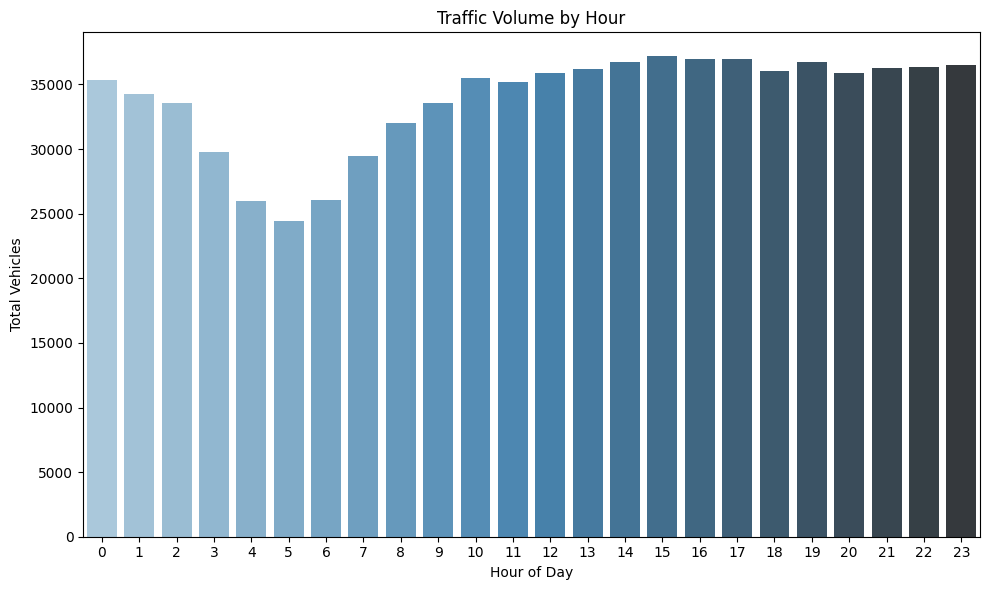

In [14]:
# Ensure Hour is extracted from DateTime
df_cleaned['Hour'] = df_cleaned['DateTime'].dt.hour
hourly_traffic = df_cleaned.groupby('Hour')['Vehicles'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Vehicles', data=hourly_traffic, palette='Blues_d')
plt.title('Traffic Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Vehicles')
plt.tight_layout()
plt.show()



**Traffic Volume by Weekday**

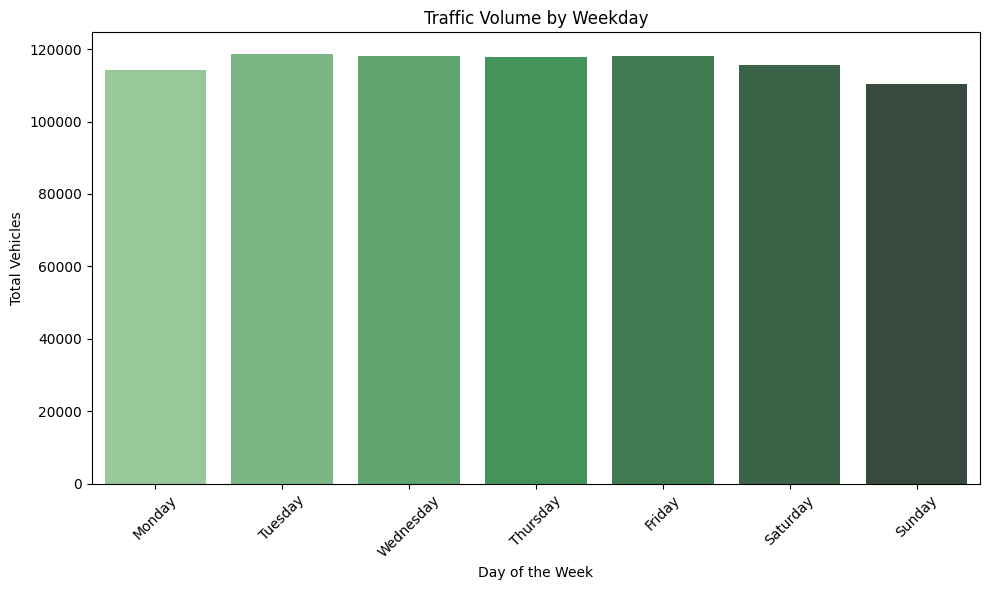

In [15]:
df_cleaned['Weekday'] = df_cleaned['DateTime'].dt.day_name()
# Ensure correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekday_traffic = df_cleaned.groupby('Weekday')['Vehicles'].sum().reindex(weekday_order).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday', y='Vehicles', data=weekday_traffic, palette='Greens_d')
plt.title('Traffic Volume by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Total Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Total Traffic Volume by Month**

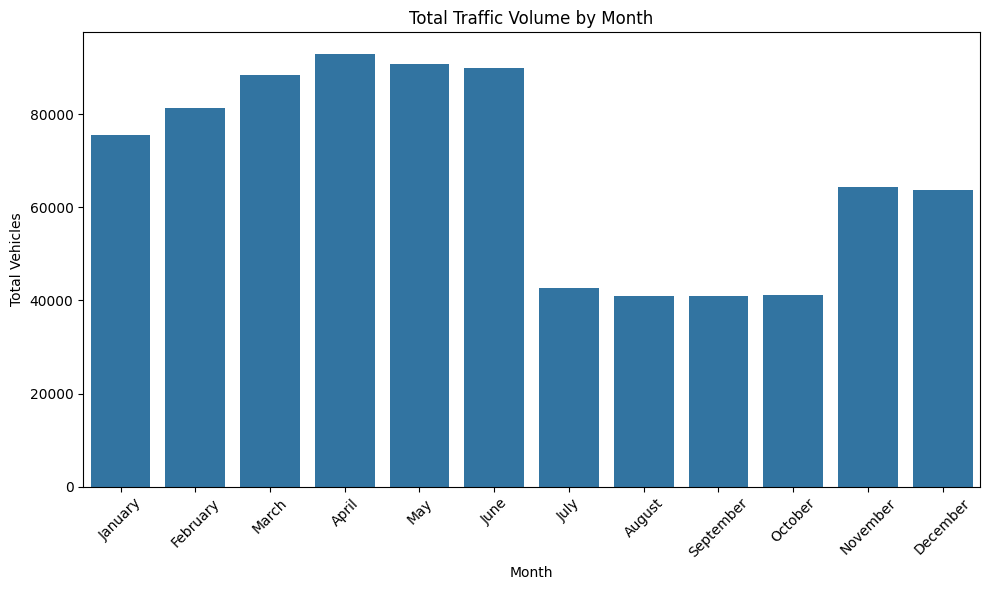

In [16]:
# Create Month and Month number columns
df_cleaned['Month'] = df_cleaned['DateTime'].dt.strftime('%B')  # Full month name
df_cleaned['Month_num'] = df_cleaned['DateTime'].dt.month       # For sorting

# Group data
monthly_traffic = df_cleaned.groupby(['Month', 'Month_num'])['Vehicles'].sum().reset_index()
monthly_traffic = monthly_traffic.sort_values('Month_num')

# Bar plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Vehicles', data=monthly_traffic)
plt.title('Total Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Total Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Traffic Volume Over Time**

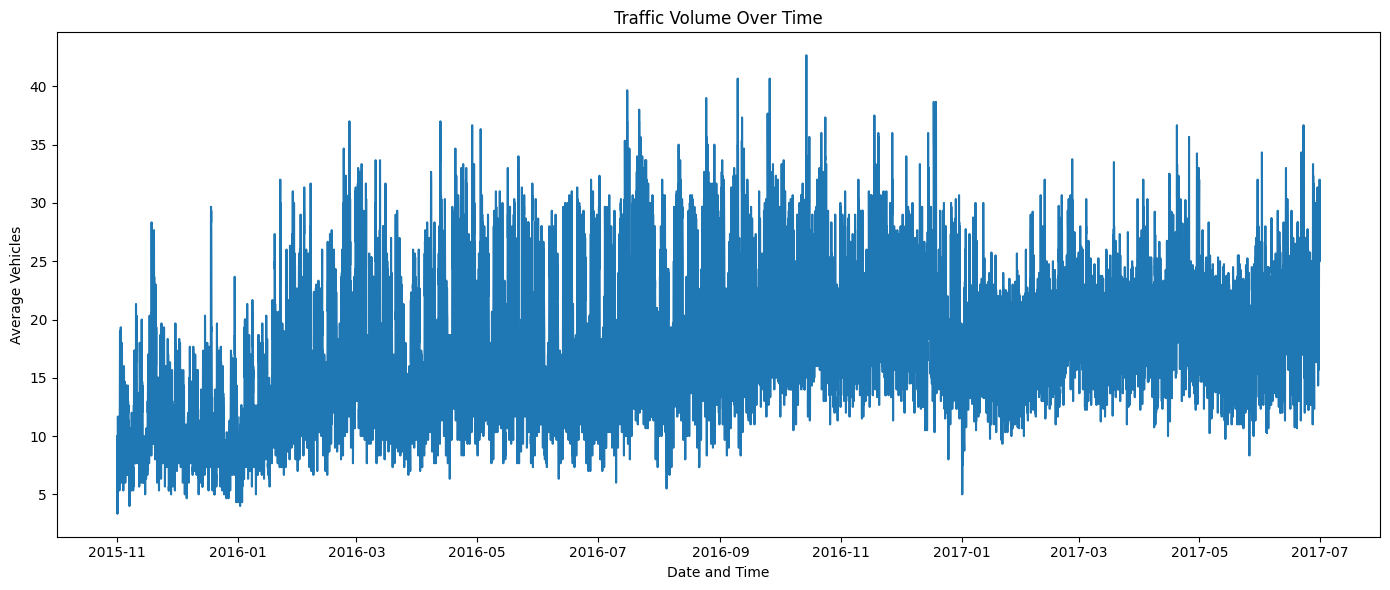

In [17]:
# Group by exact DateTime for hourly trend
hourly_avg = df_cleaned.groupby('DateTime')['Vehicles'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='DateTime', y='Vehicles', data=hourly_avg)
plt.title('Traffic Volume Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Average Vehicles')
plt.tight_layout()
plt.show()
